In [ ]:
import pandas as pd

In [ ]:
productive_file = pd.read_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_H1_5TCR/02.mapping_vdj/Hum_1129PBMC_H1_5TCR_produtive.tsv", sep='\t')

In [ ]:
productive_file

In [ ]:
productive_file = productive_file[productive_file["chain"].isin(["TRA","TRB"])]

In [ ]:
        groupby_elements = [
            'chain',
            'aaSeqCDR3',
        ]

In [ ]:
        groupby_elements = [
            'chain',
            'bestVGene',
            'bestJGene',
            'aaSeqCDR3',
            'nSeqCDR3',
        ]

In [ ]:
clonetypes = productive_file.groupby(groupby_elements, as_index=False).agg({"readID": "count"})

In [ ]:
clonetypes["aaSeqCDR3"] = clonetypes.loc[:, ["chain", "aaSeqCDR3"]].apply(':'.join, axis=1)

In [ ]:
clonetypes

In [ ]:
clonetypes = clonetypes.sort_values("readID", ascending=False)

In [ ]:
clonetypes = clonetypes.reset_index()

In [ ]:
clonetypes["CDR3_ID"] = pd.Series(clonetypes.index) + 1

In [ ]:
clonetypes = clonetypes.rename(columns={"readID": "Frequency"})

In [ ]:
sum_frequency = sum(clonetypes["Frequency"])

In [ ]:
clonetypes["Proportion"] = clonetypes["Frequency"].apply(lambda x : x / sum_frequency * 100)

In [ ]:
clonetypes["Proportion"] = clonetypes["Proportion"].apply(lambda x: str(round(x, 2)) + '%' )

In [ ]:
clonetypes

In [ ]:
clonetypes = clonetypes[["CDR3_ID", "aaSeqCDR3", "Frequency", "Proportion"]]

In [ ]:
clonetypes.to_csv(sep=',', index=False)

In [ ]:
clonetypes

In [ ]:
CDR3_dict = dict(zip(clonetypes["aaSeqCDR3"], clonetypes["CDR3_ID"]))

In [ ]:
CDR3_dict

In [ ]:
productive_file

In [ ]:
        out_file = pd.DataFrame({
                        'readID':in_file.readID,
                        'chain':in_file.chain,
                        'v_gene':in_file.bestVGene,
                        'd_gene':'None',
                        'j_gene':in_file.bestJGene,
                        'c_gene':'None',
                        'full_length':True,
                        'productive':True,
                        'cdr3':in_file.aaSeqCDR3,
                        'cdr3_nt':in_file.nSeqCDR3,
                        'raw_clonotype_id':in_file.aaSeqCDR3.apply(lambda x: CDR3_dict[x])
                        })

In [ ]:
        df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/Mus_1205Spleen_H1_5TCR/02.mapping_vdj/Mus_1205Spleen_H1_5TCR_airr.tsv", sep='\t')
        df.fillna("", inplace=True)
        total_reads = df.shape[0]

In [ ]:
df.shape[0]

In [ ]:
df[(df["v_call"]!="") | ((df["d_call"]!="")) | ((df["j_call"]!=""))]

In [ ]:
df[df["v_call"]!=""].shape[0]

In [ ]:
df[df["d_call"]!=""].shape[0]

In [ ]:
df[df["j_call"]!=""].shape[0]

In [ ]:
df.columns

In [ ]:
df[df["cdr3_aa"]!=""].shape[0]

In [ ]:
mu =  pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/zhedaTCR/tcr_mu/WT-antibody-T/03.assemble/WT-antibody-T/outs/airr_rearrangement.tsv", sep='\t')

In [ ]:
hs = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj10x/20221212_7.1/YJM-1125-T-X1/03.assemble/YJM-1125-T-X1/outs/airr_rearrangement.tsv", sep='\t')

In [ ]:
(mu.v_sequence_start).mean()

In [ ]:
(mu.v_sequence_end).mean()

In [ ]:
(hs.v_sequence_start).mean()

In [ ]:
(hs.v_sequence_end).mean()

In [ ]:
(mu.j_sequence_start).mean()

In [ ]:
(mu.j_sequence_end).mean()

In [ ]:
(hs.j_sequence_start).mean()

In [ ]:
(hs.j_sequence_end).mean()

In [ ]:
(mu.junction_aa).apply(lambda x: len(x)).mean()

In [ ]:
(hs.junction_aa).apply(lambda x: len(x)).mean()

In [1]:
import pandas as pd 
import os
import glob
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

In [2]:
glob.glob("/SGRNJ06/randd/USER/cjj/bulk_vdj/*/03*/*_clonetypes.csv")

['/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_L1_5TCR/03.count_vdj/Hum_1129PBMC_L1_5TCR_clonetypes.csv',
 '/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_H2_5TCR/03.count_vdj/Hum_1129PBMC_H2_5TCR_clonetypes.csv',
 '/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_H1_5TCR/03.count_vdj/Hum_1129PBMC_H1_5TCR_clonetypes.csv',
 '/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_L2_5TCR/03.count_vdj/Hum_1129PBMC_L2_5TCR_clonetypes.csv']

In [3]:
l1=pd.read_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_L1_5TCR/03.count_vdj/Hum_1129PBMC_L1_5TCR_clonetypes.csv")
h2=pd.read_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_H2_5TCR/03.count_vdj/Hum_1129PBMC_H2_5TCR_clonetypes.csv")
h1=pd.read_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_H1_5TCR/03.count_vdj/Hum_1129PBMC_H1_5TCR_clonetypes.csv")
l2=pd.read_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/Hum_1129PBMC_L2_5TCR/03.count_vdj/Hum_1129PBMC_L2_5TCR_clonetypes.csv")

In [37]:
h1

,CDR3_ID,aaSeqCDR3,Frequency,Proportion
0,1,TRB:CAILDGRYEQYF,1363439,12.93%
1,2,TRB:CASRTTDWRDYGYTF,355253,3.37%
2,3,TRA:CAVAHHTGTASKLTF,336672,3.19%
3,4,TRB:CASSLYGGGPYGYTF,317305,3.01%
4,5,TRB:CASSVASGGRQETQYF,287866,2.73%
...,...,...,...,...
434553,434554,TRB:CAISPVRAPGGEQFF,1,0.0%
434554,434555,TRB:CAISPVRAIGGEQFF,1,0.0%
434555,434556,TRB:CAISPVRAGGYSL,1,0.0%
434556,434557,TRB:CAISPVRAGGYSF,1,0.0%


In [20]:
h1_top100 = h1.head(200)
h2_top100 = h2.head(200)
l1_top100 = l1.head(200) 
l2_top100 = l2.head(200) 

In [21]:
h_res = pd.merge(h1_top100,h2_top100, on="aaSeqCDR3", how="inner", suffixes=('_H1', '_H2'))

In [22]:
h_res

,CDR3_ID_H1,aaSeqCDR3,Frequency_H1,Proportion_H1,CDR3_ID_H2,Frequency_H2,Proportion_H2
0,1,TRB:CAILDGRYEQYF,1363439,12.93%,1,1082110,11.64%
1,2,TRB:CASRTTDWRDYGYTF,355253,3.37%,2,283441,3.05%
2,3,TRA:CAVAHHTGTASKLTF,336672,3.19%,3,276807,2.98%
3,4,TRB:CASSLYGGGPYGYTF,317305,3.01%,4,256121,2.76%
4,5,TRB:CASSVASGGRQETQYF,287866,2.73%,5,243198,2.62%
...,...,...,...,...,...,...,...
188,195,TRB:CAILDGRYAQYF,6386,0.06%,180,6708,0.07%
189,196,TRB:CASSGASGGRQETQYF,6326,0.06%,183,6530,0.07%
190,197,TRA:GAVAHHTGTASKLTF,6116,0.06%,184,6440,0.07%
191,199,TRB:CAILDGRYEQYL,6036,0.06%,194,5398,0.06%


In [23]:
h_res = h_res[["aaSeqCDR3","CDR3_ID_H1","Frequency_H1","Proportion_H1","CDR3_ID_H2","Frequency_H2","Proportion_H2"]]

In [24]:
h_res

,aaSeqCDR3,CDR3_ID_H1,Frequency_H1,Proportion_H1,CDR3_ID_H2,Frequency_H2,Proportion_H2
0,TRB:CAILDGRYEQYF,1,1363439,12.93%,1,1082110,11.64%
1,TRB:CASRTTDWRDYGYTF,2,355253,3.37%,2,283441,3.05%
2,TRA:CAVAHHTGTASKLTF,3,336672,3.19%,3,276807,2.98%
3,TRB:CASSLYGGGPYGYTF,4,317305,3.01%,4,256121,2.76%
4,TRB:CASSVASGGRQETQYF,5,287866,2.73%,5,243198,2.62%
...,...,...,...,...,...,...,...
188,TRB:CAILDGRYAQYF,195,6386,0.06%,180,6708,0.07%
189,TRB:CASSGASGGRQETQYF,196,6326,0.06%,183,6530,0.07%
190,TRA:GAVAHHTGTASKLTF,197,6116,0.06%,184,6440,0.07%
191,TRB:CAILDGRYEQYL,199,6036,0.06%,194,5398,0.06%


In [25]:
l_res = pd.merge(l1_top100,l2_top100, on="aaSeqCDR3", how="inner",  suffixes=("_L1", "_L2"))

In [26]:
l_res

,CDR3_ID_L1,aaSeqCDR3,Frequency_L1,Proportion_L1,CDR3_ID_L2,Frequency_L2,Proportion_L2
0,1,TRB:CAILDGRYEQYF,979716,10.6%,1,1746088,14.51%
1,2,TRB:CASSLSTSGSYEQYV,387594,4.19%,2,467642,3.88%
2,3,TRB:CASRTTDWRDYGYTF,311257,3.37%,3,453246,3.77%
3,4,TRB:CASSVASGGRQETQYF,307432,3.33%,5,383782,3.19%
4,6,TRA:CAISGGGGNKLTF,136126,1.47%,13,133614,1.11%
...,...,...,...,...,...,...,...
90,187,TRB:CAILDGRYEQFF,3337,0.04%,148,5914,0.05%
91,190,TRB:CAILDGRSEQYF,3196,0.03%,196,3432,0.03%
92,193,TRB:CAILDWRYEQYF,3089,0.03%,164,4743,0.04%
93,195,TRB:CASRTTDWRDYG,3053,0.03%,157,5119,0.04%


In [27]:
l_res = l_res[["aaSeqCDR3","CDR3_ID_L1","Frequency_L1","Proportion_L1","CDR3_ID_L2","Frequency_L2","Proportion_L2"]]

In [28]:
l_res

,aaSeqCDR3,CDR3_ID_L1,Frequency_L1,Proportion_L1,CDR3_ID_L2,Frequency_L2,Proportion_L2
0,TRB:CAILDGRYEQYF,1,979716,10.6%,1,1746088,14.51%
1,TRB:CASSLSTSGSYEQYV,2,387594,4.19%,2,467642,3.88%
2,TRB:CASRTTDWRDYGYTF,3,311257,3.37%,3,453246,3.77%
3,TRB:CASSVASGGRQETQYF,4,307432,3.33%,5,383782,3.19%
4,TRA:CAISGGGGNKLTF,6,136126,1.47%,13,133614,1.11%
...,...,...,...,...,...,...,...
90,TRB:CAILDGRYEQFF,187,3337,0.04%,148,5914,0.05%
91,TRB:CAILDGRSEQYF,190,3196,0.03%,196,3432,0.03%
92,TRB:CAILDWRYEQYF,193,3089,0.03%,164,4743,0.04%
93,TRB:CASRTTDWRDYG,195,3053,0.03%,157,5119,0.04%


In [31]:
h_res.to_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_H_clonotypes.csv",sep=',', index=False)

In [32]:
l_res.to_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_L_clonotypes.csv",sep=',', index=False)

In [4]:
h1_a = h1[h1["aaSeqCDR3"].str.contains("TRA")]
h1_b = h1[h1["aaSeqCDR3"].str.contains("TRB")]
h2_a = h2[h2["aaSeqCDR3"].str.contains("TRA")]
h2_b = h2[h2["aaSeqCDR3"].str.contains("TRB")]
l1_a = l1[l1["aaSeqCDR3"].str.contains("TRA")]
l1_b = l1[l1["aaSeqCDR3"].str.contains("TRB")]
l2_a = l2[l2["aaSeqCDR3"].str.contains("TRA")]
l2_b = l2[l2["aaSeqCDR3"].str.contains("TRB")]

In [12]:
h1_a_top200 = h1_a.head(200)
h1_b_top200 = h1_b.head(200)

h2_a_top200 = h2_a.head(200)
h2_b_top200 = h2_b.head(200)

l1_a_top200 = l1_a.head(200)
l1_b_top200 = l1_b.head(200)

l2_a_top200 = l2_a.head(200)
l2_b_top200 = l2_b.head(200)

In [13]:
h_a_res = pd.merge(h1_a_top200,h2_a_top200, on="aaSeqCDR3", how="inner", suffixes=('_H1', '_H2'))
h_b_res = pd.merge(h1_b_top200,h2_b_top200, on="aaSeqCDR3", how="inner", suffixes=('_H1', '_H2'))
l_a_res = pd.merge(l1_a_top200,l2_a_top200, on="aaSeqCDR3", how="inner", suffixes=('_L1', '_L2'))
l_b_res = pd.merge(l1_b_top200,l2_b_top200, on="aaSeqCDR3", how="inner", suffixes=('_L1', '_L2'))

In [14]:
h_a_res = h_a_res[["aaSeqCDR3","CDR3_ID_H1","Frequency_H1","Proportion_H1","CDR3_ID_H2","Frequency_H2","Proportion_H2"]]
l_a_res = l_a_res[["aaSeqCDR3","CDR3_ID_L1","Frequency_L1","Proportion_L1","CDR3_ID_L2","Frequency_L2","Proportion_L2"]]

h_b_res = h_b_res[["aaSeqCDR3","CDR3_ID_H1","Frequency_H1","Proportion_H1","CDR3_ID_H2","Frequency_H2","Proportion_H2"]]
l_b_res = l_b_res[["aaSeqCDR3","CDR3_ID_L1","Frequency_L1","Proportion_L1","CDR3_ID_L2","Frequency_L2","Proportion_L2"]]

In [20]:
l_b_res

,aaSeqCDR3,CDR3_ID_L1,Frequency_L1,Proportion_L1,CDR3_ID_L2,Frequency_L2,Proportion_L2
0,TRB:CAILDGRYEQYF,1,979716,10.6%,1,1746088,14.51%
1,TRB:CASSLSTSGSYEQYV,2,387594,4.19%,2,467642,3.88%
2,TRB:CASRTTDWRDYGYTF,3,311257,3.37%,3,453246,3.77%
3,TRB:CASSVASGGRQETQYF,4,307432,3.33%,5,383782,3.19%
4,TRB:CASSSDRGWSEAFF,7,126287,1.37%,21,86287,0.72%
...,...,...,...,...,...,...,...
105,TRB:CASTIDAEAFF,260,1687,0.02%,158,4995,0.04%
106,TRB:CAVLDGRYEQYF,262,1678,0.02%,215,2767,0.02%
107,TRB:CASRTTDWRDYGY,264,1670,0.02%,207,3062,0.03%
108,TRB:CAIPDGRYEQYF,266,1670,0.02%,213,2823,0.02%


In [33]:
h_a_res.to_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_H_TRA_clonotypes.csv",sep=',', index=False)
l_a_res.to_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_L_TRA_clonotypes.csv",sep=',', index=False)
h_b_res.to_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_H_TRB_clonotypes.csv",sep=',', index=False)
l_b_res.to_csv("/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_L_TRB_clonotypes.csv",sep=',', index=False)

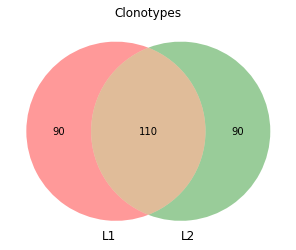

In [19]:
    data_10X_set = set(l1_b_top200.aaSeqCDR3)
    data_SGR_set = set(l2_b_top200.aaSeqCDR3)
    subset_ = [data_10X_set,data_SGR_set]
    plt.figure(facecolor='white')
    venn2(subset_, set_labels = ('L1', 'L2'), set_colors=('r', 'g'))
    plt.title('Clonotypes')
    plt.savefig('/SGRNJ06/randd/USER/cjj/bulk_vdj/clonotypes/top200_L_TRB_Vnplot.png',dpi=280)